#### Задание исследовать функции:
1. f = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
2. f = 2 * x ** 3 + 2 * x ** 2 - 18 * x - 18
3. f = (x ** 2 + 3) / (3 * (x + 1))

Исследуем 2ю функцию:
f = 2 * x ** 3 + 2 * x ** 2 - 18 * x - 18

In [1]:
from sympy import *
from sympy.plotting import plot
init_printing

<function sympy.interactive.printing.init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)>

In [75]:
x=Symbol('x')
f= 2 * x ** 3 + 2 * x ** 2 - 18 * x - 18

Построим график

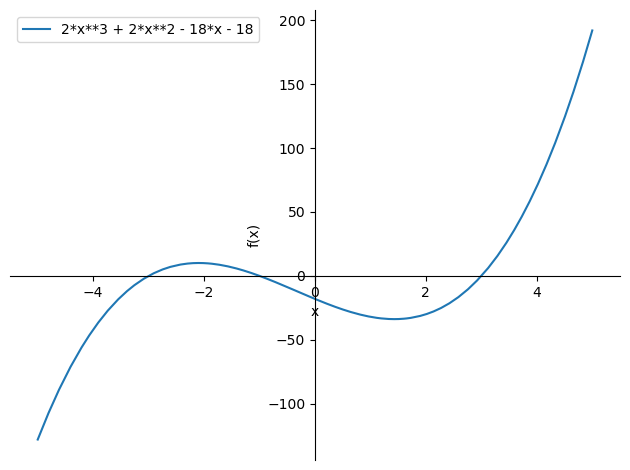

In [76]:
plot(f, (x, -5, 5), legend=True)

Область определения функции

In [85]:
Reals - singularities(f, x) 

Reals

Определим корни или нули функции

In [78]:
solveset(f,x)

{-3, -1, 3}

Точка пересечения с осью y (x=0)

In [91]:
f.subs(x,0)

-18

In [95]:
k=limit(f/x,x,oo)
b=limit(f-k*x,x,oo)

print(f'k={k},b={b} ')
print('Ассимптот нет')

k=oo,b=Limit(2*x**3 + 2*x**2 - oo*x - 18, x, oo, dir='-') 
Ассимптот нет


Найдем интервалы, на которых функция возрастает и убывает

In [93]:
b= [-oo,oo]
b[1:1]=solve(diff(f),x)
b

[-oo, -1/3 + 2*sqrt(7)/3, -2*sqrt(7)/3 - 1/3, oo]

In [81]:
f_diff = [-oo, oo]
f_diff[1:1] = solve(diff(f), x)

incr_list = []
decr_list = []

for i in range(1, len(f_diff)):
    val = is_decreasing(f, Interval.open(f_diff[i - 1], f_diff[i]))
    if val:
        decr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
    else:
        incr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
        
print(f"Возрастает на интервалах:", *incr_list, sep="\n")
print(f"Убывает на интервалах:", *decr_list, sep="\n")


Возрастает на интервалах:
[-oo, -1/3 + 2*sqrt(7)/3]
[-2*sqrt(7)/3 - 1/3, oo]
Убывает на интервалах:
[-1/3 + 2*sqrt(7)/3, -2*sqrt(7)/3 - 1/3]


Вычислим вершину (экстремумы функции)

In [82]:
#из семинара (не универсальный вариант)
e=solve(diff(f),x)
for i in e:
    g=f.subs(x,i)
    if g<0:
        print(f"Нижний экстремум: x: {i}, y: {g}")
    elif g>0:
        print(f"Верхний экстремум: x: {i}, y: {g}")

Нижний экстремум: x: -1/3 + 2*sqrt(7)/3, y: -12*sqrt(7) - 12 + 2*(-1/3 + 2*sqrt(7)/3)**2 + 2*(-1/3 + 2*sqrt(7)/3)**3
Верхний экстремум: x: -2*sqrt(7)/3 - 1/3, y: 2*(-2*sqrt(7)/3 - 1/3)**3 - 12 + 2*(-2*sqrt(7)/3 - 1/3)**2 + 12*sqrt(7)


In [99]:
#мой вариант
df=solve(diff(f),x)
b= [-oo,oo]
b[1:1]=solve(diff(f),x)
c=sorted(b)
# print(df)
# print(c)
for j in df:
    for i in range(1, len(f_diff)-1):
        if i==c.index(j):
            val1 = is_increasing(f, Interval.open(c[i - 1], c[i]))
            val2 = is_decreasing(f, Interval.open(c[i], c[i+1]))
#             print(j,i,val1,val2)
            if val1==val2==True:
                print(f"Точка локального максимума: x: {j}, y: {f.subs(x,j)}")
            elif val1==val2==False:
                print(f"Точка локального минимума: x: {j}, y: {f.subs(x,j)}")
            else:
                print(f"непонятно: x: {j}, y: {f.subs(x,j)}")

Точка локального минимума: x: -1/3 + 2*sqrt(7)/3, y: -12*sqrt(7) - 12 + 2*(-1/3 + 2*sqrt(7)/3)**2 + 2*(-1/3 + 2*sqrt(7)/3)**3
Точка локального максимума: x: -2*sqrt(7)/3 - 1/3, y: 2*(-2*sqrt(7)/3 - 1/3)**3 - 12 + 2*(-2*sqrt(7)/3 - 1/3)**2 + 12*sqrt(7)


Определим промежутки знакопостоянства функции

In [83]:
#мой вариант
m= [-oo,oo]
pos_list=[]
neg_list=[]
m[1:1]=sorted(solve(f,x))
if is_decreasing(f, Interval.open(m[0],m[1]))==True:
    pos_list.append(f"[{m[0]},{m[1]}]")
    for i in range(2,len(m),2):
        neg_list.append(f"[{m[i-1]},{m[i]}]")
    for i in range(3,len(m),2):
        pos_list.append(f"[{m[i-1]},{m[i]}]")
else:
    neg_list.append(f"[{m[0]},{m[1]}]")
    for i in range(2,len(m),2):
        pos_list.append(f"[{m[i-1]},{m[i]}]")
    for i in range(3,len(m),2):
        neg_list.append(f"[{m[i-1]},{m[i]}]")
print(m)
print("f > 0:", *pos_list, sep="\n")
print("f < 0:", *neg_list, sep="\n")

[-oo, -3, -1, 3, oo]
f > 0:
[-3,-1]
[3,oo]
f < 0:
[-oo,-3]
[-1,3]
